In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a
from astropy.time import Time
from astropy.time import TimeDelta
from sunpy.time import parse_time

matplotlib.rcParams['font.size']=16

In [2]:
yrs=[]
nfg=[]
nfs=[]

sgall=[]
ssall=[]
print('Year, GOES, SSWLE')
for years in range(2010,2023):  
    trange=a.Time(str(years)+"-01-01",str(years+1)+"-01-01")
    resg = Fido.search(trange,a.hek.EventType("FL"),a.hek.OBS.Observatory == "GOES")
    ress = Fido.search(trange,a.hek.EventType("FL"),a.hek.FRM.Name == "SSW Latest Events")
    hresg=resg["hek"]
    sg = hresg["event_starttime", "event_peaktime","event_endtime", "fl_goescls","hgs_x","hgs_y"]
    sgall.append(sg)
    hress=ress["hek"]
    ss = hress["event_starttime", "event_peaktime","event_endtime", "fl_goescls","hgs_x","hgs_y"]
    ssall.append(ss)
    
    yrs.append(years)
    nfg.append(len(hresg))
    nfs.append(len(hress))
               
    print(years,len(resg["hek"]),len(ress["hek"]))

Year, GOES, SSWLE
2010 1347 1305
2011 2229 2468
2012 2188 1689
2013 2062 1457
2014 2259 2261
2015 2050 2025
2016 1271 1350
2017 1156 1194
2018 335 520
2019 265 452
2020 552 1256
2021 2079 2643
2022 3160 4624


In [3]:
# Put everything in single lists
sts=[]
pts=[]
ets=[]
gcs=[]
hgxs=[]
hgys=[]
for s in ssall:
    sts.extend(s["event_starttime"].datetime)
    pts.extend(s["event_peaktime"].datetime)
    ets.extend(s["event_endtime"].datetime)
    gcs.extend(s["fl_goescls"])
    hgxs.extend(s["hgs_x"])
    hgys.extend(s["hgs_y"])
    
stg=[]
ptg=[]
etg=[]
gcg=[]
hgxg=[]
hgyg=[]
for s in sgall:
    stg.extend(s["event_starttime"].datetime)
    ptg.extend(s["event_peaktime"].datetime)
    etg.extend(s["event_endtime"].datetime)
    gcg.extend(s["fl_goescls"])
    hgxg.extend(s["hgs_x"])
    hgyg.extend(s["hgs_y"])

In [4]:
print(f'Number of GOES List flares: {len(gcg):d}')
print(f'Number of Latest Event flares: {len(gcs):d}')

Number of GOES List flares: 20953
Number of Latest Event flares: 23244


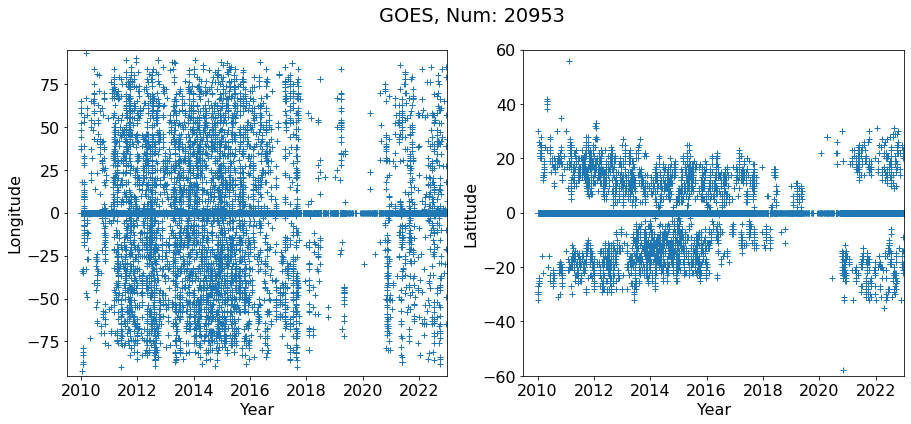

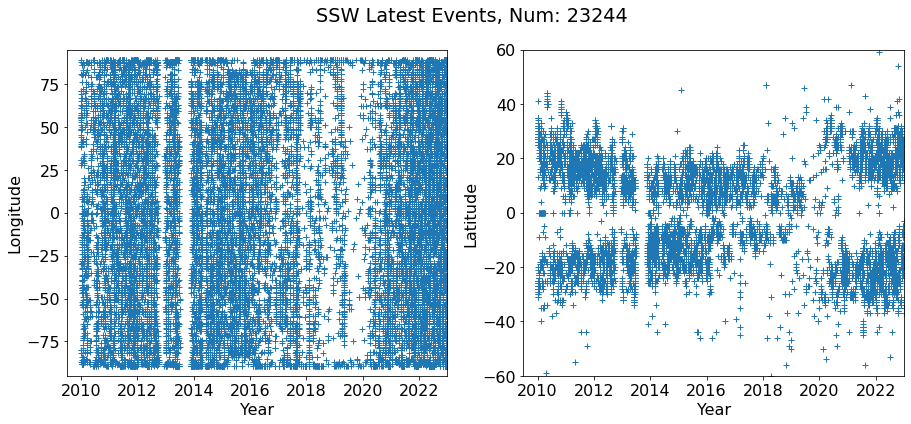

In [8]:
matplotlib.rcParams['font.size']=16
fig,axs=plt.subplots(1,2,figsize=(15,6))
fig.suptitle(f'GOES, Num: {len(stg):d}')
axs[0].plot(stg,hgxg,'+')
axs[0].set_ylabel('Longitude')
axs[0].set_ylim([-95,95])
axs[1].plot(stg,hgyg,'+')
axs[1].set_ylabel('Latitude')
axs[1].set_ylim([-60,60])
for ax in axs:
    ax.set_xlim(["2009-07-01","2023-01-01"])
    ax.set_xlabel("Year")
plt.show()

fig,axs=plt.subplots(1,2,figsize=(15,6))
fig.suptitle(f'SSW Latest Events, Num: {len(sts):d}')
axs[0].plot(sts,hgxs,'+')
axs[0].set_ylabel('Longitude')
axs[0].set_ylim([-95,95])
axs[1].plot(sts,hgys,'+')
axs[1].set_ylabel('Latitude')
axs[1].set_ylim([-60,60])
for ax in axs:
    ax.set_xlim(["2009-07-01","2023-01-01"])
    ax.set_xlabel("Year")
plt.show()

In [6]:
# Change GOES Class back into a peak flux
gfg=np.zeros(len(gcg))
i=0
for g in gcg:
    cl=g[0]
    vl=g[1:]
    if cl == "A":
        scl=1e-8
    elif cl == "B":
        scl=1e-7
    elif cl == "C":
        scl=1e-6
    elif cl == "M":
        scl=1e-5
    elif cl == "X":
        scl=1e-4
    gfg[i]=scl*float(vl)
    i+=1

gfs=np.zeros(len(gcs))
i=0
for g in gcs:
    cl=g[0]
    vl=g[1:]
    if cl == "A":
        scl=1e-8
    elif cl == "B":
        scl=1e-7
    elif cl == "C":
        scl=1e-6
    elif cl == "M":
        scl=1e-5
    elif cl == "X":
        scl=1e-4
    gfs[i]=scl*float(vl)
    i+=1       

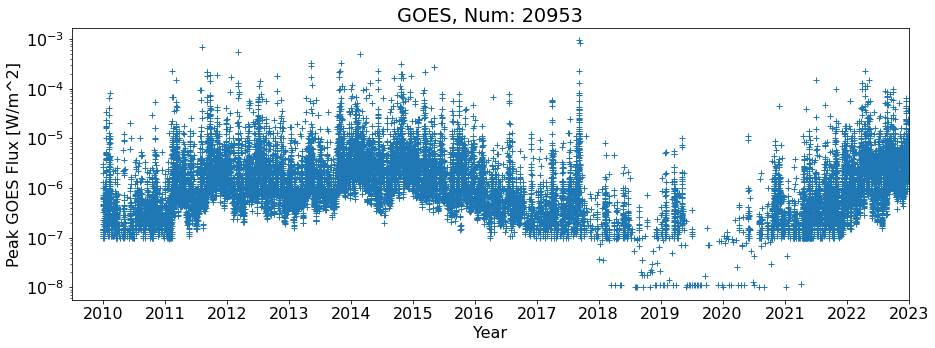

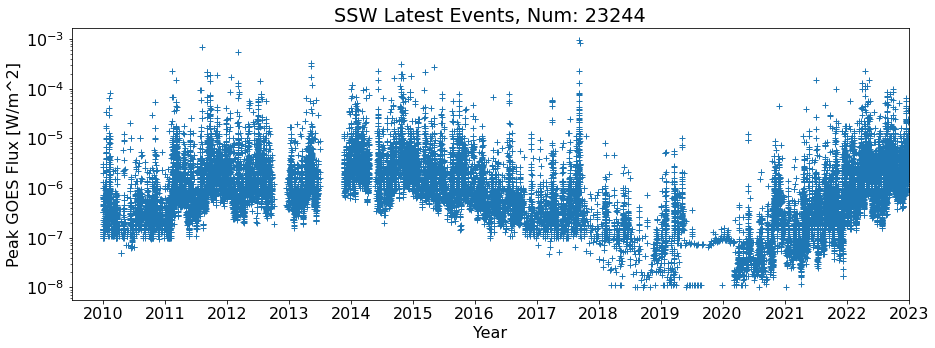

In [7]:
matplotlib.rcParams['font.size']=16

majorx=matplotlib.dates.YearLocator(1)

fig,ax=plt.subplots(figsize=(15,5))
plt.plot(stg,gfg,'+')
plt.yscale('log')
ax.set_xlim(["2009-07-01","2023-01-01"])
ax.xaxis.set_major_locator(majorx)
ax.set_ylabel('Peak GOES Flux [W/m^2]')
ax.set_xlabel('Year')
ax.set_title(f'GOES, Num: {len(stg):d}')
plt.show()

fig,ax=plt.subplots(figsize=(15,5))
plt.plot(sts,gfs,'+')
plt.yscale('log')
ax.set_xlim(["2009-07-01","2023-01-01"])
ax.set_ylabel('Peak GOES Flux [W/m^2]')
ax.set_xlabel('Year')
ax.set_title(f'SSW Latest Events, Num: {len(sts):d}')
ax.xaxis.set_major_locator(majorx)
plt.show()